## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from math import radians, cos, sin, asin, sqrt
import datetime as dt

import sklearn.metrics as metrics

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
from xgboost.sklearn import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", 60)
pd.set_option("display.max_rows", 500)
%matplotlib inline
sns.set()

/home/dev/virtualenvs/ga-dsi-capstone/local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


## Read Data

In [2]:
df_twn_hkg_flights = pd.read_csv('../data/filtered_flights_twn_hkg.csv', index_col=0)

In [3]:
df_twn_hkg_flights.head()

,flight_id,timestamp_utc,latitude,longitude,altitude,heading,speed,timestamp_dt,flight_callsign,aircraft_model,aircraft_registration,airline,origin,destination,scheduled_departure_utc,scheduled_arrival_utc,real_departure_utc,estimated_arrival_utc,real_flight_duration,scheduled_departure_dt,scheduled_arrival_dt,real_departure_dt,estimated_arrival_dt,scheduled_flight_duration,route,forecasted_arrival_dt,forecasted_arrival_dt_nearest_hr,arrivals,timestamp_dt_weather,air_temp,...,wind_speed,altimeter_pressure,visibility,gust_speed,sky_level_1_coverage,sky_level_1_altitude,weather_codes,apparent_temp,weather_codes_+SHRA,weather_codes_+TSRA,weather_codes_-BR,weather_codes_-DZ,weather_codes_-RA,weather_codes_-SHRA,weather_codes_BR,weather_codes_DZ,weather_codes_HZ,weather_codes_RA,weather_codes_SHRA,weather_codes_TSRA,weather_codes_VCTS,speed_interval,time_since_real_departure,prev_latitude,prev_longitude,calculated_flight_duration,calculated_time_before_arrival,displacement_to_hkg,displacement_fr_twn,minutes_since_real_departure_interval
0,c0aabc0,1483194745,25.090073,121.237190,950,46,143,2016-12-31 14:32:25,CAL,Boeing 747,B-18717,China Airlines Cargo,Taiwan Taoyuan International Airport,Hong Kong International Airport,1.483193e+09,1.483198e+09,1.483195e+09,NaN,4663.0,2016-12-31 14:00:00,2016-12-31 15:30:00,2016-12-31 14:32:05,NaN,5400.0,Taiwan Taoyuan International Airport -> Hong K...,2016-12-31 15:49:48,2016-12-31 15:00:00,6,2016-12-31 15:00:00,66.2,...,10.0,30.18,6.21,0,FEW,2500,NaN,66.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100 < speed <= 200,20.0,25.072781,121.218529,5115.0,5095.0,806.651564,2.544945,0 <= min <= 10
1,c0aabc0,1483194754,25.093964,121.242012,1375,48,145,2016-12-31 14:32:34,CAL,Boeing 747,B-18717,China Airlines Cargo,Taiwan Taoyuan International Airport,Hong Kong International Airport,1.483193e+09,1.483198e+09,1.483195e+09,NaN,4663.0,2016-12-31 14:00:00,2016-12-31 15:30:00,2016-12-31 14:32:05,NaN,5400.0,Taiwan Taoyuan International Airport -> Hong K...,2016-12-31 15:49:48,2016-12-31 15:00:00,6,2016-12-31 15:00:00,66.2,...,10.0,30.18,6.21,0,FEW,2500,NaN,66.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100 < speed <= 200,29.0,25.090073,121.237190,5115.0,5086.0,807.260143,3.189686,0 <= min <= 10
2,c0aabc0,1483194770,25.101013,121.251183,2100,50,153,2016-12-31 14:32:50,CAL,Boeing 747,B-18717,China Airlines Cargo,Taiwan Taoyuan International Airport,Hong Kong International Airport,1.483193e+09,1.483198e+09,1.483195e+09,NaN,4663.0,2016-12-31 14:00:00,2016-12-31 15:30:00,2016-12-31 14:32:05,NaN,5400.0,Taiwan Taoyuan International Airport -> Hong K...,2016-12-31 15:49:48,2016-12-31 15:00:00,6,2016-12-31 15:00:00,66.2,...,10.0,30.18,6.21,0,FEW,2500,NaN,66.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100 < speed <= 200,45.0,25.093964,121.242012,5115.0,5070.0,808.403669,4.392177,0 <= min <= 10
3,c0aabc0,1483194776,25.103577,121.254631,2300,50,159,2016-12-31 14:32:56,CAL,Boeing 747,B-18717,China Airlines Cargo,Taiwan Taoyuan International Airport,Hong Kong International Airport,1.483193e+09,1.483198e+09,1.483195e+09,NaN,4663.0,2016-12-31 14:00:00,2016-12-31 15:30:00,2016-12-31 14:32:05,NaN,5400.0,Taiwan Taoyuan International Airport -> Hong K...,2016-12-31 15:49:48,2016-12-31 15:00:00,6,2016-12-31 15:00:00,66.2,...,10.0,30.18,6.21,0,FEW,2500,NaN,66.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100 < speed <= 200,51.0,25.101013,121.251183,5115.0,5064.0,808.830179,4.838551,0 <= min <= 10
4,c0aabc0,1483194782,25.107010,121.259155,2525,50,171,2016-12-31 14:33:02,CAL,Boeing 747,B-18717,China Airlines Cargo,Taiwan Taoyuan International Airport,Hong Kong International Airport,1.483193e+09,1.483198e+09,1.483195e+09,NaN,4663.0,2016-12-31 14:00:00,2016-12-31 15:30:00,2016-12-31 14:32:05,NaN,5400.0,Taiwan Taoyuan International Airport -> Hong K...,2016-12-31 15:49:48,2016-12-31 15:00:00,6,2016-12-31 15:00:00,66.2,...,10.0,30.18,6.21,0,FEW,2500,NaN,66.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [4]:
df_twn_hkg_flights['scheduled_departure_dt'] = pd.to_datetime(df_twn_hkg_flights['scheduled_departure_dt'])
df_twn_hkg_flights['scheduled_arrival_dt'] = pd.to_datetime(df_twn_hkg_flights['scheduled_arrival_dt'])
df_twn_hkg_flights['real_departure_dt'] = pd.to_datetime(df_twn_hkg_flights['real_departure_dt'])
df_twn_hkg_flights['estimated_arrival_dt'] = pd.to_datetime(df_twn_hkg_flights['estimated_arrival_dt'])

In [5]:
df_twn_hkg_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171766 entries, 0 to 171765
Data columns (total 63 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   flight_id                              171766 non-null  object        
 1   timestamp_utc                          171766 non-null  int64         
 2   latitude                               171766 non-null  float64       
 3   longitude                              171766 non-null  float64       
 4   altitude                               171766 non-null  int64         
 5   heading                                171766 non-null  int64         
 6   speed                                  171766 non-null  int64         
 7   timestamp_dt                           171766 non-null  object        
 8   flight_callsign                        171766 non-null  object        
 9   aircraft_model                         171766 no

In [6]:
# plt.figure(figsize=(8,5))
# sns.lineplot(x="calculated_time_before_arrival", y="displacement_to_hkg", data=df_twn_hkg_flights[df_twn_hkg_flights['flight_id'] == 'c0aabc0'])

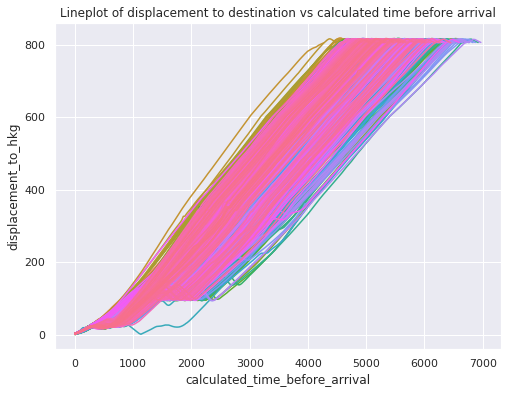

In [7]:
plt.figure(figsize=(8,6))
sns.lineplot(x="calculated_time_before_arrival", y="displacement_to_hkg", 
             hue='flight_id', legend=False, data=df_twn_hkg_flights)
plt.title('Lineplot of displacement to destination vs calculated time before arrival')
plt.savefig('../images/02a-modeling-every-time-point/{}.png'.format('01-lineplot-disp_vs_time'), transparent=True)

**Correlation of numerical variables**

In [8]:
corr_df = df_twn_hkg_flights[['timestamp_utc', 'latitude', 'longitude',
                              'altitude', 'heading', 'speed',
                              'scheduled_departure_utc', 'scheduled_arrival_utc',
                              'real_departure_utc', 'estimated_arrival_utc',
                              'real_flight_duration', 'scheduled_flight_duration',
                              'arrivals', 'time_since_real_departure', 
                              'prev_latitude', 'prev_longitude',
                              'calculated_flight_duration', 'calculated_time_before_arrival',
                              'displacement_to_hkg', 'displacement_fr_twn']].corr()

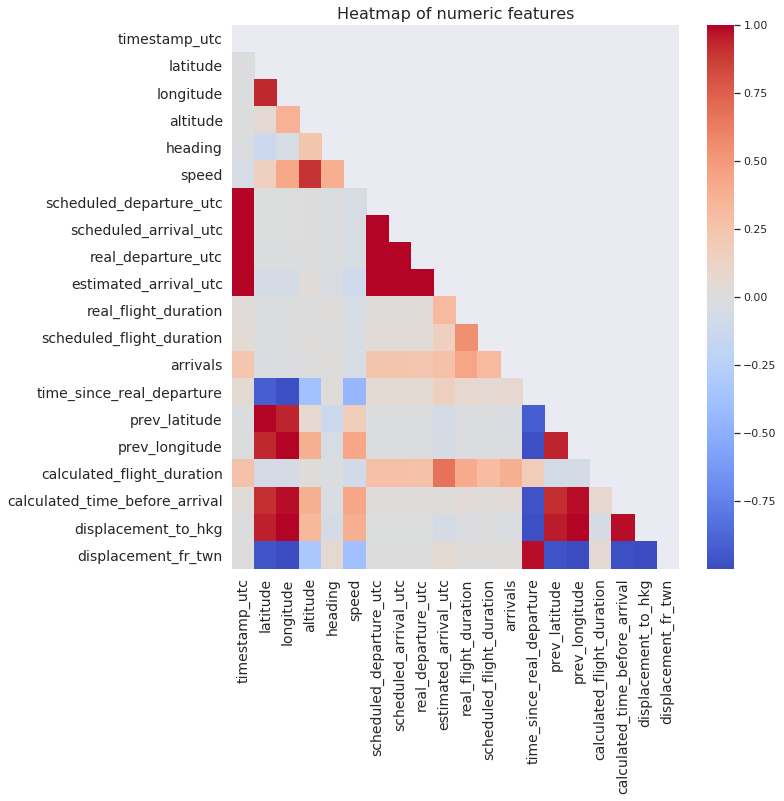

In [9]:
# Set the default matplotlib figure size to 7x7:
fig, ax = plt.subplots(figsize=(10, 10))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(corr_df, mask=mask, ax=ax, cmap="coolwarm")

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

ax.set_title('Heatmap of numeric features', fontsize=16)

fig.savefig('../images/02a-modeling-every-time-point/{}.png'.format('02-heatmap'), transparent=True)
# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

In [10]:
corr_df['calculated_time_before_arrival'].sort_values().abs() > 0.5

displacement_fr_twn                True
time_since_real_departure          True
heading                           False
timestamp_utc                     False
real_departure_utc                False
estimated_arrival_utc             False
scheduled_flight_duration         False
scheduled_departure_utc           False
scheduled_arrival_utc             False
arrivals                          False
real_flight_duration              False
calculated_flight_duration        False
altitude                          False
speed                             False
latitude                           True
prev_latitude                      True
displacement_to_hkg                True
prev_longitude                     True
longitude                          True
calculated_time_before_arrival     True
Name: calculated_time_before_arrival, dtype: bool

<Figure size 864x576 with 0 Axes>

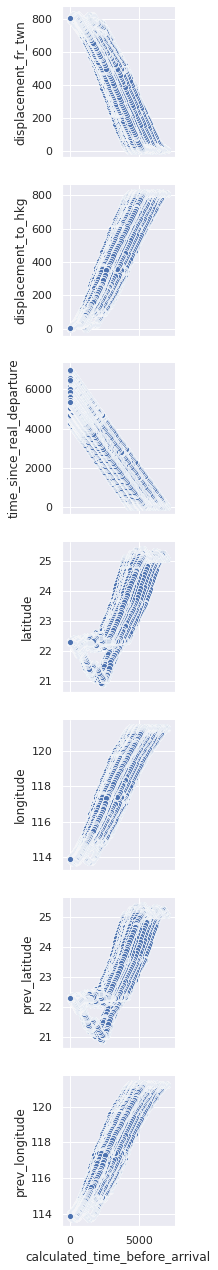

In [11]:
plt.figure(figsize=(12,8))
sns.pairplot(df_twn_hkg_flights, 
             y_vars=['displacement_fr_twn', 'displacement_to_hkg', 
                     'time_since_real_departure', 
                     'latitude', 'longitude',
                     'prev_latitude', 'prev_longitude'], 
             x_vars=['calculated_time_before_arrival'])
plt.savefig('../images/02a-modeling-every-time-point/{}.png'.format('03-scatterplot-target_vs_features'), transparent=True)

In [12]:
# data = df_twn_hkg_flights.copy()
# data.set_index('timestamp_dt', inplace=True, drop=True)
# data.loc[data['flight_id'] == 'c0aabc0', 'displacement_to_hkg'].plot(lw=2.5, figsize=(12,5))

In [13]:
# plt.plot(data.loc[data['flight_id'] == 'c0aabc0', 'displacement_to_hkg'],
#          data.loc[data['flight_id'] == 'c0aabc0', 'calculated_time_before_arrival'])

In [14]:
# linreg = LinearRegression()
# linreg.fit(data.loc[data['flight_id'] == 'c0aabc0', ['calculated_time_before_arrival']],
#            data.loc[data['flight_id'] == 'c0aabc0', 'displacement_to_hkg'])
# linreg.coef_

**ANOVA of categorical (nominal) variables**

In [15]:
f_values, p_values = f_classif(df_twn_hkg_flights[['flight_callsign', 'aircraft_model', 
                                                   'aircraft_registration', 'airline']]\
                               .apply(LabelEncoder().fit_transform), 
                               df_twn_hkg_flights['calculated_time_before_arrival'])

p_values

array([0.99999169, 0.11689826, 0.86909034, 0.70125192])

All levels or groups in the selected nominal variables have equal variance therefore it is likely not to have an impact on the target variable. Therefore they are omitted from the model.

## Feature Selection

In [16]:
selected_features = [
    'latitude', 'longitude', 
    'altitude', 'heading', 'speed',
#     'flight_callsign', 
#     'aircraft_registration', 
#     'aircraft_model', 'airline'
]

nominal_features = [
# #     'flight_callsign', 
#     'aircraft_model', 
#     'aircraft_registration',
#     'airline'
]

df_twn_hkg_flights[selected_features].head()

,latitude,longitude,altitude,heading,speed
0,25.090073,121.237190,950,46,143
1,25.093964,121.242012,1375,48,145
2,25.101013,121.251183,2100,50,153
3,25.103577,121.254631,2300,50,159
4,25.107010,121.259155,2525,50,171


In [17]:
### Regression Evaluation Metrics and Diagnostic Plots

def r2_adj(y_true, y_preds, p):
    n = len(y_true)
    y_mean = np.mean(y_true)
    numerator = np.sum(np.square(y_true - y_preds)) / (n - p - 1)
    denominator = np.sum(np.square(y_true - y_mean)) / (n - 1)
    return (1 - (numerator / denominator))

def get_regression_metrics(y_true, y_pred, p):
    mse = metrics.mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
#     msle = metrics.mean_squared_log_error(y_true, y_pred)
    mae = metrics.median_absolute_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)
    r2a = r2_adj(y_true, y_pred, p)
    
    print('Mean squared error      = ', mse)
    print('Root mean squared error = ', rmse)
#     print('Mean squared log error  = ', msle)
    print('Median absolute error   = ', mae)
    print('R^2                     = ', r2)
    print('Adjusted R^2            = ', r2a)
    
    return {
        'mse': mse,
        'rmse': rmse,
#         'msle': msle,
        'mae': mae,
        'r2': r2,
        'r2_adjusted': r2a
    }

def regression_diagnostic_plots(df_true_pred, filename):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
    axes = axes.ravel()
    
    
    # Residual Plot: Validating the assumption of linearity
    sns.residplot('pred', 'true', data=df_true_pred,lowess=True,
                  line_kws={'color': 'red', 'lw': 1, 'alpha': 1}, 
                  ax=axes[0])
    axes[0].set_title('Residual Plot')
    axes[0].set_ylabel('Residuals')
    axes[0].set_xlabel('Fitted Values')
    
    residuals = df_true_pred['true'] - df_true_pred['pred']
    
    # Normal Q-Q Plot: Validating the assumption of normally distributed residuals (errors)
    stats.probplot(residuals, dist='norm', plot=axes[1])
    axes[1].set_title('Normal Q-Q Plot')
    
    
    # Scale-Location plot: Validating the assumption of homoscedasticity of residuals
    model_norm_residuals_abs_sqrt=np.sqrt(np.abs(residuals))

    sns.regplot(df_true_pred['pred'], model_norm_residuals_abs_sqrt,
                scatter=True,
                lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8}, 
                ax=axes[2])
    axes[2].set_title("Scale-Location Plot")
    axes[2].set_ylabel("Standarized Residuals")
    axes[2].set_xlabel("Fitted Values")
    
    axes[3].axis('off')
    
    fig.tight_layout()
    fig.savefig('../images/02a-modeling-every-time-point/{}.png'.format(filename), transparent=True)

In [18]:
# Train data

# mask = df_twn_hkg_flights['time_since_real_departure'] <= (140*60)
# df_for_modeling = df_twn_hkg_flights[mask].copy()
df_for_modeling = df_twn_hkg_flights.copy()
X = df_for_modeling[selected_features].copy()
y = df_for_modeling['calculated_time_before_arrival'].copy()

## Get dummies for nominal features

In [19]:
X = pd.get_dummies(X, columns=nominal_features, drop_first=True)

## Train-test split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

## Modeling

In [21]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

joblib.dump(linreg, '../models/02a-linear-reg.pkl')

['../models/02a-linear-reg.pkl']

In [22]:
# X_train.columns

In [23]:
# plt.figure(figsize=(12,10))
# plt.barh(X_train.columns, linreg.coef_)

In [24]:
y_train_pred = linreg.predict(X_train)

train_regression_metrics = get_regression_metrics(y_train, y_train_pred, X_train.shape[1])

Mean squared error      =  133392.94978062963
Root mean squared error =  365.2299957295808
Median absolute error   =  186.88593905647576
R^2                     =  0.9637589787495764
Adjusted R^2            =  0.963757659992708


In [25]:
y_test_pred = linreg.predict(X_test)

test_regression_metrics = get_regression_metrics(y_test, y_test_pred, X_test.shape[1])

df_test_true_pred = pd.DataFrame(columns=['true', 'pred'])
df_test_true_pred = df_test_true_pred.assign(true=y_test)
df_test_true_pred = df_test_true_pred.assign(pred=y_test_pred)
df_test_true_pred['diff'] = df_test_true_pred['true'] - df_test_true_pred['pred']

Mean squared error      =  130799.21666387893
Root mean squared error =  361.6617434342191
Median absolute error   =  184.1625879357307
R^2                     =  0.9641355240162
Adjusted R^2            =  0.9641303032644847


In [26]:
df_test_true_pred.shape

(34354, 3)

In [27]:
df_test_true_pred[df_test_true_pred['diff'] < 0].shape # if true < pred => late

(17557, 3)

In [28]:
df_test_true_pred[df_test_true_pred.pred < 0].shape

(0, 3)

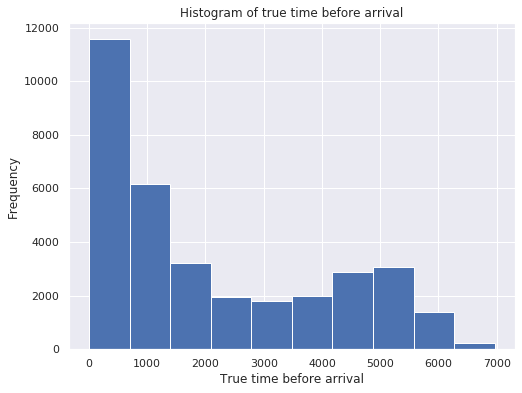

In [29]:
plt.figure(figsize=(8,6))
plt.title('Histogram of true time before arrival')
df_test_true_pred.true.hist()
plt.xlabel('True time before arrival')
plt.ylabel('Frequency')
plt.savefig('../images/02a-modeling-every-time-point/{}.png'.format('04-histogram-true'), transparent=True)

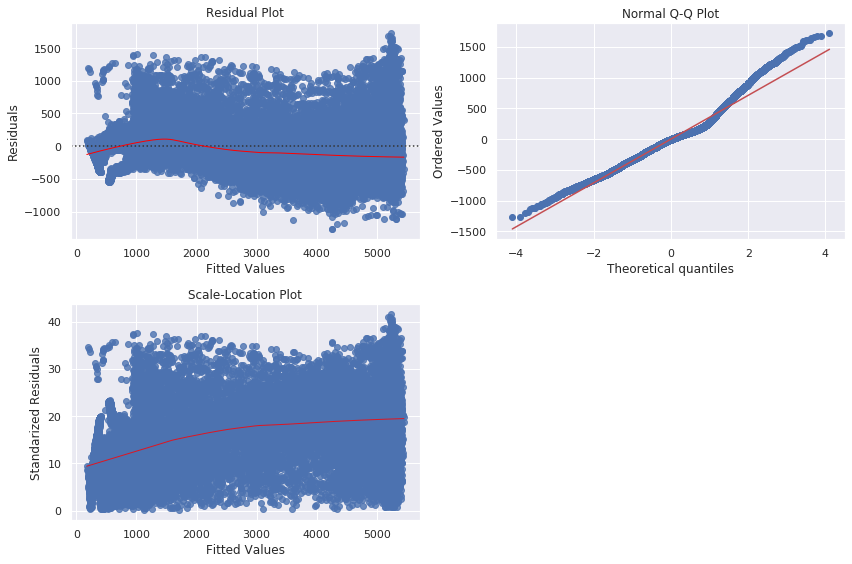

In [30]:
regression_diagnostic_plots(df_test_true_pred[df_test_true_pred['true'] > 0], '05-linreg-diagnostic')

**Standardization of features**

In [31]:
ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

In [32]:
r_alphas = np.logspace(0, 5, 200)
ridge_model = RidgeCV(alphas=r_alphas, store_cv_values=True)
ridge_model = ridge_model.fit(X_train_sc, y_train)

y_test_pred = ridge_model.predict(X_test_sc)

test_regression_metrics = get_regression_metrics(y_test, y_test_pred, X_test.shape[1])
df_test_true_pred = pd.DataFrame(columns=['true', 'pred'])
df_test_true_pred = df_test_true_pred.assign(true=y_test)
df_test_true_pred = df_test_true_pred.assign(pred=y_test_pred)
df_test_true_pred['diff'] = df_test_true_pred['true'] - df_test_true_pred['pred']

Mean squared error      =  130799.8407787543
Root mean squared error =  361.6626062765603
Median absolute error   =  184.20110023931227
R^2                     =  0.9641353528870944
Adjusted R^2            =  0.9641301321104679


In [33]:
df_test_regression_metrics = pd.DataFrame()
df_test_true_pred = pd.DataFrame(columns=['model_name', 'true', 'pred'])

In [34]:
def gridsearch_model_evaluation(model_name, model, hyper_param, joblib_filename, diagnostic_filename):
    reg_pipe = Pipeline([
        ('reg', model)
    ])
  
#     print(reg_pipe.get_params().keys())
    gs = GridSearchCV(reg_pipe, 
                      param_grid=hyper_param, 
#                       cv=cv, 
                      verbose=10, 
                      n_jobs=-1)
    gs.fit(X_train_sc, y_train)
    
    print(model_name)
    print('Best Score: {}'.format(gs.best_score_))
    print('Best Params: {}'.format(gs.best_params_))
    
    # Best Model
    grid_model = gs.best_estimator_
    joblib.dump(grid_model, joblib_filename, compress=1)
    
    print()
#     print('Model Score on X_train: {}'.format(grid_model.score(X_train_sc, y_train)))
    
    # Prediction and score
    y_test_pred = grid_model.predict(X_test_sc)

    test_regression_metrics = get_regression_metrics(y_test, y_test_pred, X_test.shape[1])
    test_regression_metrics['model_name'] = model_name
    
    df_test_true_pred = pd.DataFrame(columns=['true', 'pred'])
    df_test_true_pred = df_test_true_pred.assign(true=y_test)
    df_test_true_pred = df_test_true_pred.assign(pred=y_test_pred)
    df_test_true_pred['diff'] = df_test_true_pred['true'] - df_test_true_pred['pred']
    regression_diagnostic_plots(df_test_true_pred, diagnostic_filename)
    
    return test_regression_metrics, y_test_pred, grid_model

## Ridge Regression

In [35]:
def plot_barchart(figsize_tuple, series, filename, model_name):
    # Plot barchart
    plt.figure(figsize=figsize_tuple)

    sns.barplot(y=series.index, x=series.values, orient='h')
    plt.title('Coefficients in the {} model'.format(model_name), fontsize=12)

#     plt.xlabel('Value', fontsize=12)
#     plt.ylabel('{}'.format(feature), fontsize=12)
    plt.savefig('../images/02a-modeling-every-time-point/{}.png'.format(filename), transparent=True)
    
def plot_coefficients(coef, filename, model_name):
    coef = pd.Series(coef, index=X_train.columns)
#     print(coef.head())
    plot_barchart((8,5), coef, filename, model_name)
    
# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title, filename):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 12)
    plt.savefig('../images/02a-modeling-every-time-point/{}.png'.format(filename), transparent=True)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1896s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1475s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 106 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 220 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    2.5s
[Parallel(n_j

Ridge Regression
Best Score: 0.9637537298587174
Best Params: {'reg__alpha': 1.0}

Mean squared error      =  130799.84077768281
Root mean squared error =  361.662606275079
Median absolute error   =  184.20110047063076
R^2                     =  0.9641353528873882
Adjusted R^2            =  0.9641301321107618


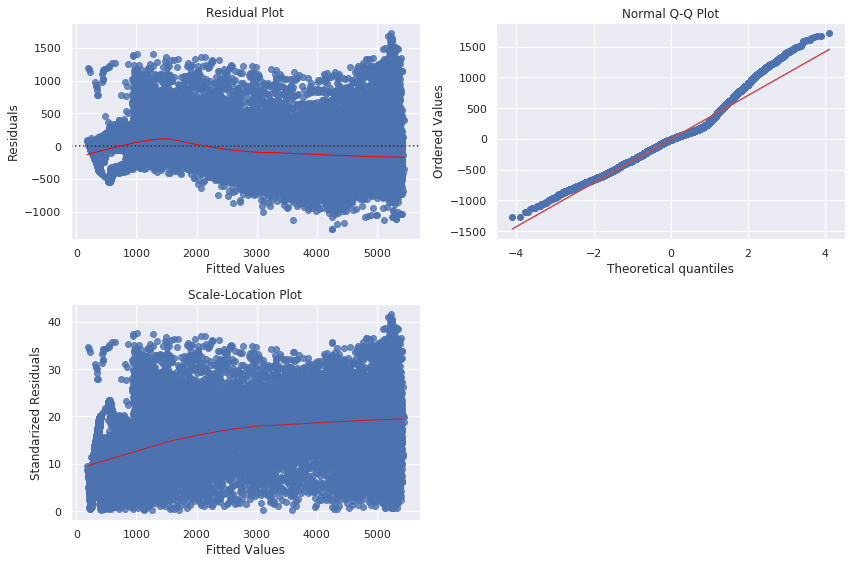

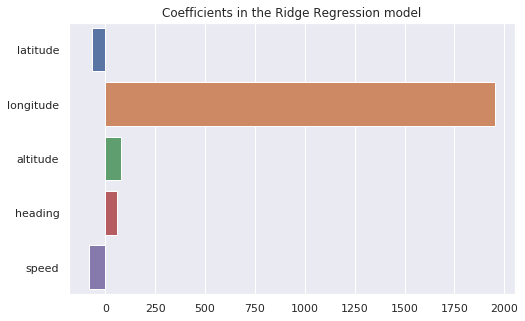

In [36]:
test_regression_metrics, y_test_pred, grid_model = gridsearch_model_evaluation('Ridge Regression',
                                                                    Ridge(),
                                                                    {'reg__alpha': np.logspace(0, 5, 200)},
                                                                    '../models/02a-ridge-reg.pkl',
                                                                    '06-ridge-diagnostic'
                                                                  )

df_test_regression_metrics = df_test_regression_metrics.append(test_regression_metrics, ignore_index=True)
plot_coefficients(grid_model.named_steps["reg"].coef_, '06-ridge-coef', 'Ridge Regression')

## Lasso Regression

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   47.8s
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:   54.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 197 tasks      | elapsed:  

Lasso Regression
Best Score: 0.9637537323310031
Best Params: {'reg__alpha': 0.001}

Mean squared error      =  130799.26865230512
Root mean squared error =  361.66181530859063
Median absolute error   =  184.16298306275883
R^2                     =  0.9641355097612395
Adjusted R^2            =  0.9641302890074491


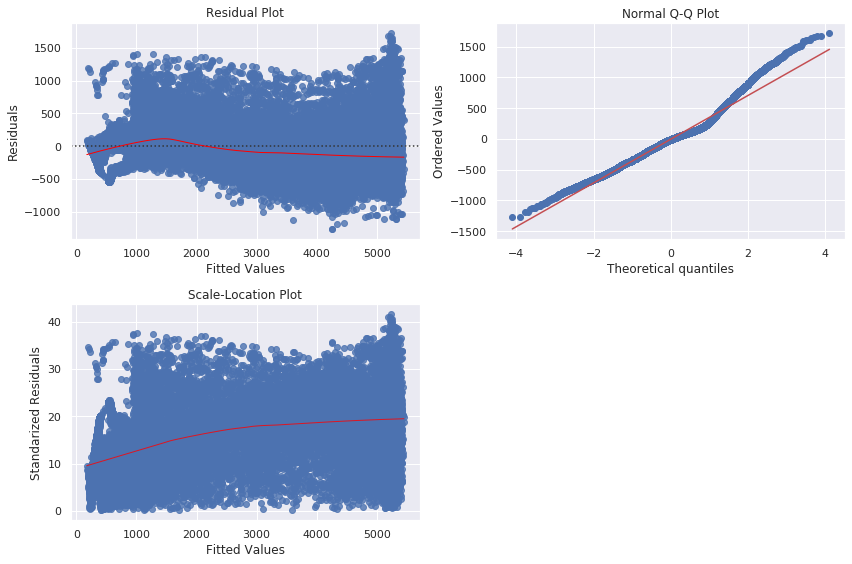

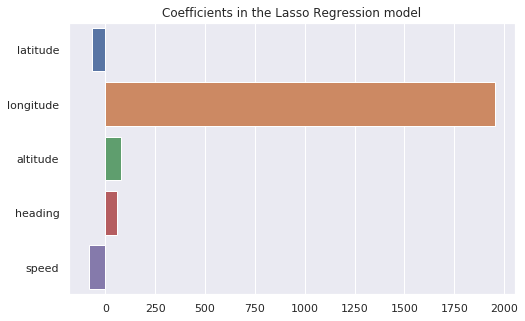

In [37]:
test_regression_metrics, y_test_pred, grid_model = gridsearch_model_evaluation('Lasso Regression',
                                                                                Lasso(),
                                                                                {'reg__alpha': np.arange(0.001, 0.15, 0.0025)},
                                                                                '../models/02a-lasso-reg.pkl',
                                                                                '07-lasso-diagnostic'
                                                                               )

df_test_regression_metrics = df_test_regression_metrics.append(test_regression_metrics, ignore_index=True)
plot_coefficients(grid_model.named_steps["reg"].coef_, '07-lasso-coef', 'Lasso Regression')

## ElasticNet Regression

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1271s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 252 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 328 ta

ElasticNet Regression
Best Score: 0.9301800439012012
Best Params: {'reg__alpha': 0.5, 'reg__l1_ratio': 0.2}

Mean squared error      =  252445.53390308243
Root mean squared error =  502.4395823410835
Median absolute error   =  311.99511838497165
R^2                     =  0.9307807262244489
Adjusted R^2            =  0.9307706500520697


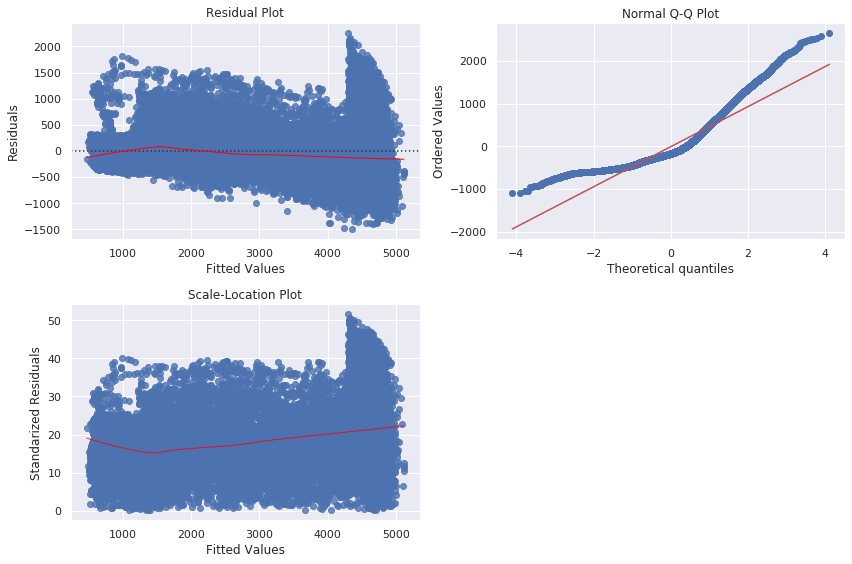

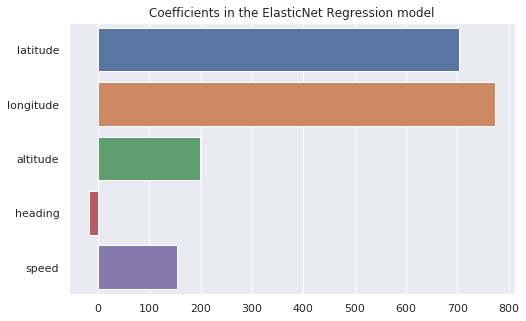

In [38]:
test_regression_metrics, y_test_pred, grid_model = gridsearch_model_evaluation('ElasticNet Regression',
                                                                    ElasticNet(),
                                                                    {'reg__alpha': np.arange(0.5, 1.0, 0.005),
                                                                     'reg__l1_ratio': [0.2]},
                                                                     '../models/02a-elasticnet-reg.pkl',
                                                                     '08-elasticnet-diagnostic')

df_test_regression_metrics = df_test_regression_metrics.append(test_regression_metrics, ignore_index=True)
plot_coefficients(grid_model.named_steps["reg"].coef_, '08-elasticnet-coef', 'ElasticNet Regression')

## Random Forest Regression

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   44.7s
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:   56.9s
[Parallel(n_jobs=-1)]: Done 110 out of 120 | elapsed:  1.3min remaining:    6.9s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.4min finished


Random Forest Regression
Best Score: 0.975304195242793
Best Params: {'reg__max_depth': 6, 'reg__n_estimators': 60}

Mean squared error      =  89684.94429728144
Root mean squared error =  299.4744468185582
Median absolute error   =  86.64438209192463
R^2                     =  0.9754088471406989
Adjusted R^2            =  0.9754052674340407


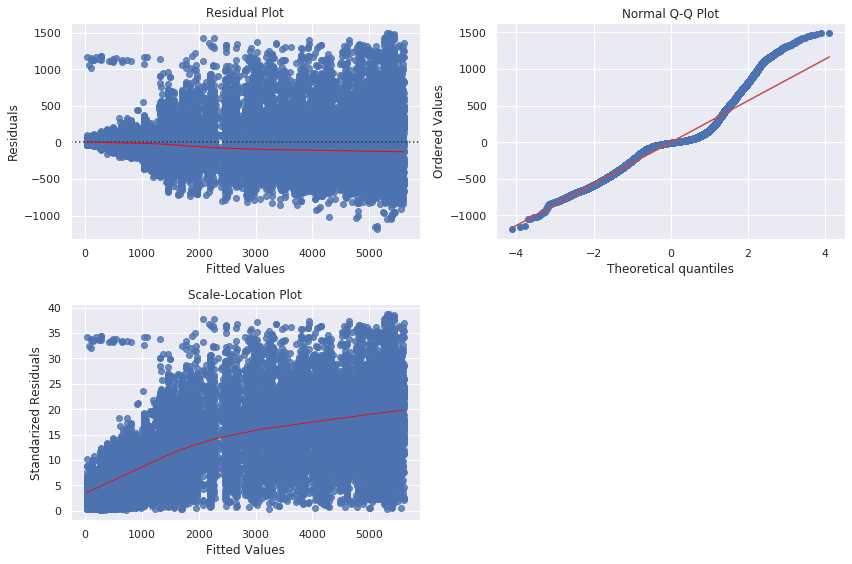

In [39]:
# https://gdcoder.com/decision-tree-regressor-explained-in-depth/
# https://medium.com/datadriveninvestor/random-forest-regression-9871bc9a25eb
test_regression_metrics, y_test_pred, grid_model = gridsearch_model_evaluation('Random Forest Regression',
                                                                    RandomForestRegressor(),
                                                                    {'reg__max_depth': range(3,7),
                                                                     'reg__n_estimators': np.arange(10, 70, 10)},
                                                                    '../models/02a-random-forest-reg.pkl',
                                                                    '09-rf-diagnostic'
                                                                   )

df_test_regression_metrics = df_test_regression_metrics.append(test_regression_metrics, ignore_index=True)

In [40]:
# 'Feature Importance: {}'.format(grid_model.named_steps["reg"].feature_importances_)

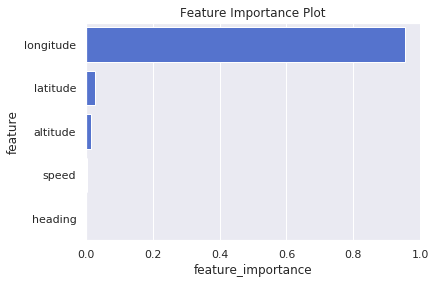

In [41]:
var_imp_plot(imp_df(X_train.columns, grid_model.named_steps["reg"].feature_importances_),
             'Feature Importance Plot',
             '09-rf-feature_importance')

## AdaBoost Regression

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:   33.2s
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   52.8s
[Parallel(n_jobs=-1)]: Done 132 out of 140 | elapsed:  1.2min remaining:    4.2s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:  1.2min finished


AdaBoost Regression
Best Score: 0.9570027486401983
Best Params: {'reg__base_estimator__max_depth': 2, 'reg__learning_rate': 0.4, 'reg__n_estimators': 25}

Mean squared error      =  178100.4928342049
Root mean squared error =  422.0195408203332
Median absolute error   =  336.2592771009448
R^2                     =  0.9511657561041095
Adjusted R^2            =  0.9511586473577639


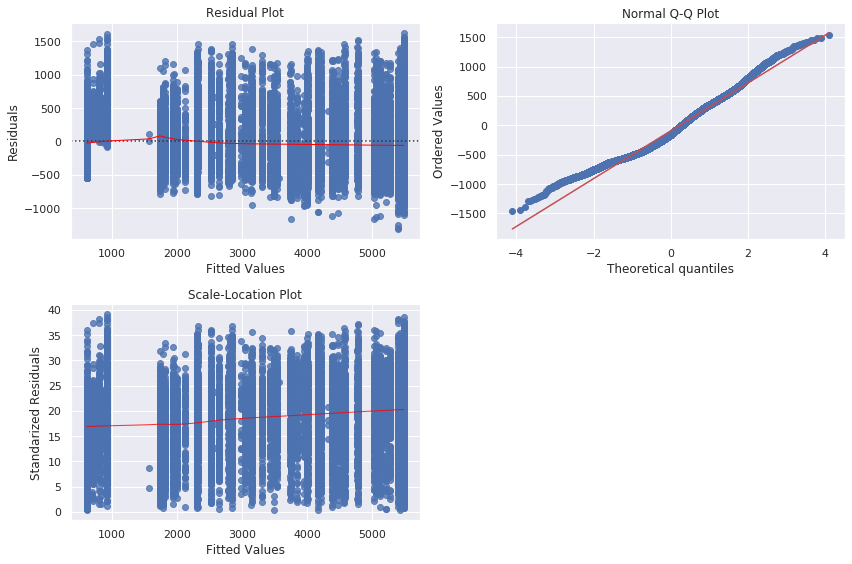

In [42]:
# https://www.programcreek.com/python/example/86712/sklearn.ensemble.AdaBoostRegressor
ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor()) 
test_regression_metrics, y_test_pred, grid_model = gridsearch_model_evaluation('AdaBoost Regression',
                                                                    ada,
                                                                    {'reg__n_estimators': [25, 50],
                                                                     'reg__base_estimator__max_depth': [1,2],
                                                                     'reg__learning_rate': np.arange(0.4, 1.1, 0.1)},
                                                                    '../models/02a-adaboost-reg.pkl',
                                                                    '10-adaboost-diagnostic'
                                                                   )

df_test_regression_metrics = df_test_regression_metrics.append(test_regression_metrics, ignore_index=True)

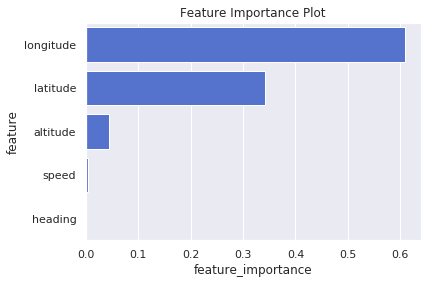

In [43]:
var_imp_plot(imp_df(X_train.columns, grid_model.named_steps["reg"].feature_importances_),
             'Feature Importance Plot',
             '10-adaboost-feature_importance')

## XGBoost

In [44]:
# # https://www.datacamp.com/community/tutorials/xgboost-in-python
# # https://www.kaggle.com/phunter/xgboost-with-gridsearchcv
# # https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

# test_regression_metrics, y_test_pred, grid_model = gridsearch_model_evaluation('XGBoost Regression',
#                                                                     XGBRegressor(
#                                                                         objective='reg:linear',
#                                                                         nthread=12,
#                                                                         eval_metric='rmse'
#                                                                     ),
#                                                                     {
#                                                                       'reg__learning_rate': [.03, 0.05, .07], #so called `eta` value
#                                                                       'reg__max_depth': [5, 6, 7],
#                                                                       'reg__min_child_weight': [4],
#                                                                       'reg__subsample': [0.7],
#                                                                       'reg__colsample_bytree': [0.7],
#                                                                       'reg__n_estimators': [500],
# #                                                                       'reg_'
#                                                                     },
#                                                                     '../models/02a-xgboost-reg.pkl',
#                                                                     '11-xgboost-diagnostic'
#                                                                    )

# df_test_regression_metrics = df_test_regression_metrics.append(test_regression_metrics, ignore_index=True)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed: 30.6min
[Parallel(n_jobs=-1)]: Done  25 out of  36 | elapsed: 38.2min remaining: 16.8min
[Parallel(n_jobs=-1)]: Done  29 out of  36 | elapsed: 38.2min remaining:  9.2min
[Parallel(n_jobs=-1)]: Done  33 out of  36 | elapsed: 38.2min remaining:  3.5min


KeyboardInterrupt: 